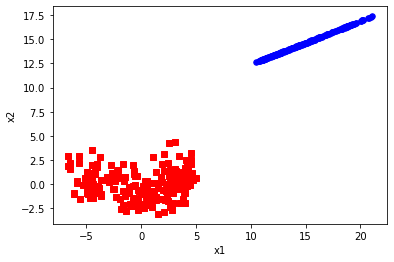

In [9]:
"""
四维数据利用PCA降维和不降维在二维空间的对比
"""


import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt  #2D绘图库



#计算均值,要求输入数据为numpy的矩阵格式，行表示样本数，列表示特征
def meanX(dataX):
    return np.mean(dataX,axis=0)       #axis=0表示按照列来求均值，如果输入list,则axis=1


#PCA降维函数
def pca(XMat, k):     #k为降维后的维数
    average = meanX(XMat)
    m, n = np.shape(XMat)     #m个样本，n个特征
    data_adjust = []
    avgs = np.tile(average, (m, 1))    #将均值数组转换为m行数组，以进行后续减法操作
    
    data_adjust = XMat - avgs
    covX = np.cov(data_adjust.T)   #计算协方差矩阵
    
    featValue, featVec=  np.linalg.eig(covX)   #np.linalg.eig求解协方差矩阵的特征值和特征向量
    index = np.argsort(-featValue)   #按照featValue进行从大到小排序
    #np.argsort(a)返回数组a中元素值从小到大排序后的索引值组成的数组
    #np.argsort(-a)返回数组a中元素值从大到小排序后的索引值组成的数组
    
    finalData = []
    
    if k > n:
        print ("k must lower than feature number")
        return
    else:
        #注意特征向量是列向量，需要转置
        selectVec = np.matrix(featVec.T[index[:k]]) 
        finalData = data_adjust * selectVec.T       #降维后的所有训练样本
        reconData = (finalData * selectVec) + average   #降维前的所有训练样本
    return finalData, reconData





#加载训练样本函数
def loaddata(datafile):
    f=open(datafile)
    return pd.read_csv(f,sep="\t",header=None)




#可视化函数
def plotBestFit(data1, data2):
    dataArr1 = np.array(data1)
    dataArr2 = np.array(data2)

    m = np.shape(dataArr1)[0]
    
    axis_x1 = []
    axis_y1 = []
    axis_x2 = []
    axis_y2 = []
    
    for i in range(m):
        axis_x1.append(dataArr1[i,0])
        axis_y1.append(dataArr1[i,1])
        axis_x2.append(dataArr2[i,0])
        axis_y2.append(dataArr2[i,1])
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(axis_x1, axis_y1, s=30, c='red', marker='s')
    ax.scatter(axis_x2, axis_y2, s=30, c='blue')
    plt.xlabel('x1'); plt.ylabel('x2');
    
    plt.savefig("outfile.png")    #保存图片
    plt.show()

    
    
    
    
#主函数
def main():
    datafile = "seed.txt"
    XMat = np.array(loaddata(datafile).iloc[:,0:7])
    k = 2
    return pca(XMat, k)





if __name__ == "__main__":
    finalData, reconMat = main()
    #print(finalData)
    #print(reconMat)
    #print(reconMat[2,0])
    plotBestFit(finalData, reconMat)